# Ne spectra

In [10]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
import os
from os.path import join
#from astropy.utils.data import get_pkg_data_filename
#from astropy.io import fits
import xarray as xr
from pathlib import Path

In [2]:
specpath = r"\\10.249.254.51\Public\Kuzmin\Experiments-Leprecon\Spectrometer\20200826"

In [3]:
specpath

'\\\\10.249.254.51\\Public\\Kuzmin\\Experiments-Leprecon\\Spectrometer\\20200826'

In [4]:
os.path.exists(specpath)

True

# Plot waterfall
See what's going on. Plotting all spectra for all coordinates of a stepping motor.<br>
First, I changed the step to see how much the spectrum moves when I change the motor coordinate.<br>
Then I choose the delta 5000, so the spectrum moves half the way, by about 1000 pixels - so it would be easy to compare the patterns.<br>
Next I made this waterfall plot. It is easy to make and has a nice overview. Just plot all spectra with a vertical shift, so they dont overlap too much.

In [5]:
print(specpath)

\\10.249.254.51\Public\Kuzmin\Experiments-Leprecon\Spectrometer\20200826


In [6]:
specpath+"\\Ne_0.01s_400000.nc" 

'\\\\10.249.254.51\\Public\\Kuzmin\\Experiments-Leprecon\\Spectrometer\\20200826\\Ne_0.01s_400000.nc'

In [8]:
os.path.join(specpath,"Ne_0.01s_400000.nc")

'\\\\10.249.254.51\\Public\\Kuzmin\\Experiments-Leprecon\\Spectrometer\\20200826\\Ne_0.01s_400000.nc'

In [61]:
x = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(x)
print(x[1,:])

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[4 5 6]


In [64]:
#os.listdir(specpath)

In [31]:
#for i in range(400000, 526000, 9000):
R = [f'{400000 + 9000*i}.nc' for i in range(15)]
for i,fp in enumerate(R):
    #print(specpath+f'\\Ne_0.01s_{i}.nc')
    print(i,fp)

0 400000.nc
1 409000.nc
2 418000.nc
3 427000.nc
4 436000.nc
5 445000.nc
6 454000.nc
7 463000.nc
8 472000.nc
9 481000.nc
10 490000.nc
11 499000.nc
12 508000.nc
13 517000.nc
14 526000.nc


In [65]:
#for i in range(400000, 526000, 9000):
R = [f'{400000 + 9000*i}.nc' for i in range(15)]
for i,fp in enumerate(R):
    fpath = specpath+f'\\Ne_0.01s_{fp}'    
ds = xr.open_dataset(fpath)

In [39]:
ds

<xarray.Dataset>
Dimensions:                        (x: 2048, y: 512)
Coordinates:
    image_counter                  int32 ...
Dimensions without coordinates: x, y
Data variables:
    __xarray_dataarray_variable__  (y, x) uint16 3986 3997 3955 ... 4001 4011

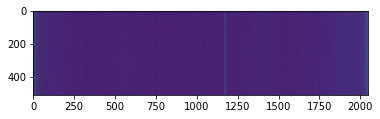

In [55]:
data = ds.to_array()[0]
imshow(data)

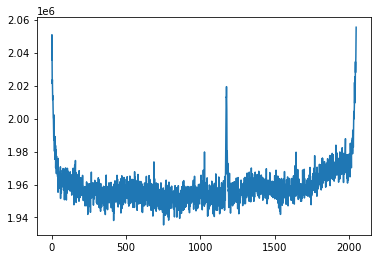

In [70]:
plot(data.sum(axis=0))

TypeError: cannot directly convert an xarray.Dataset into a numpy array. Instead, create an xarray.DataArray first, either with indexing on the Dataset or by invoking the `to_array()` method.

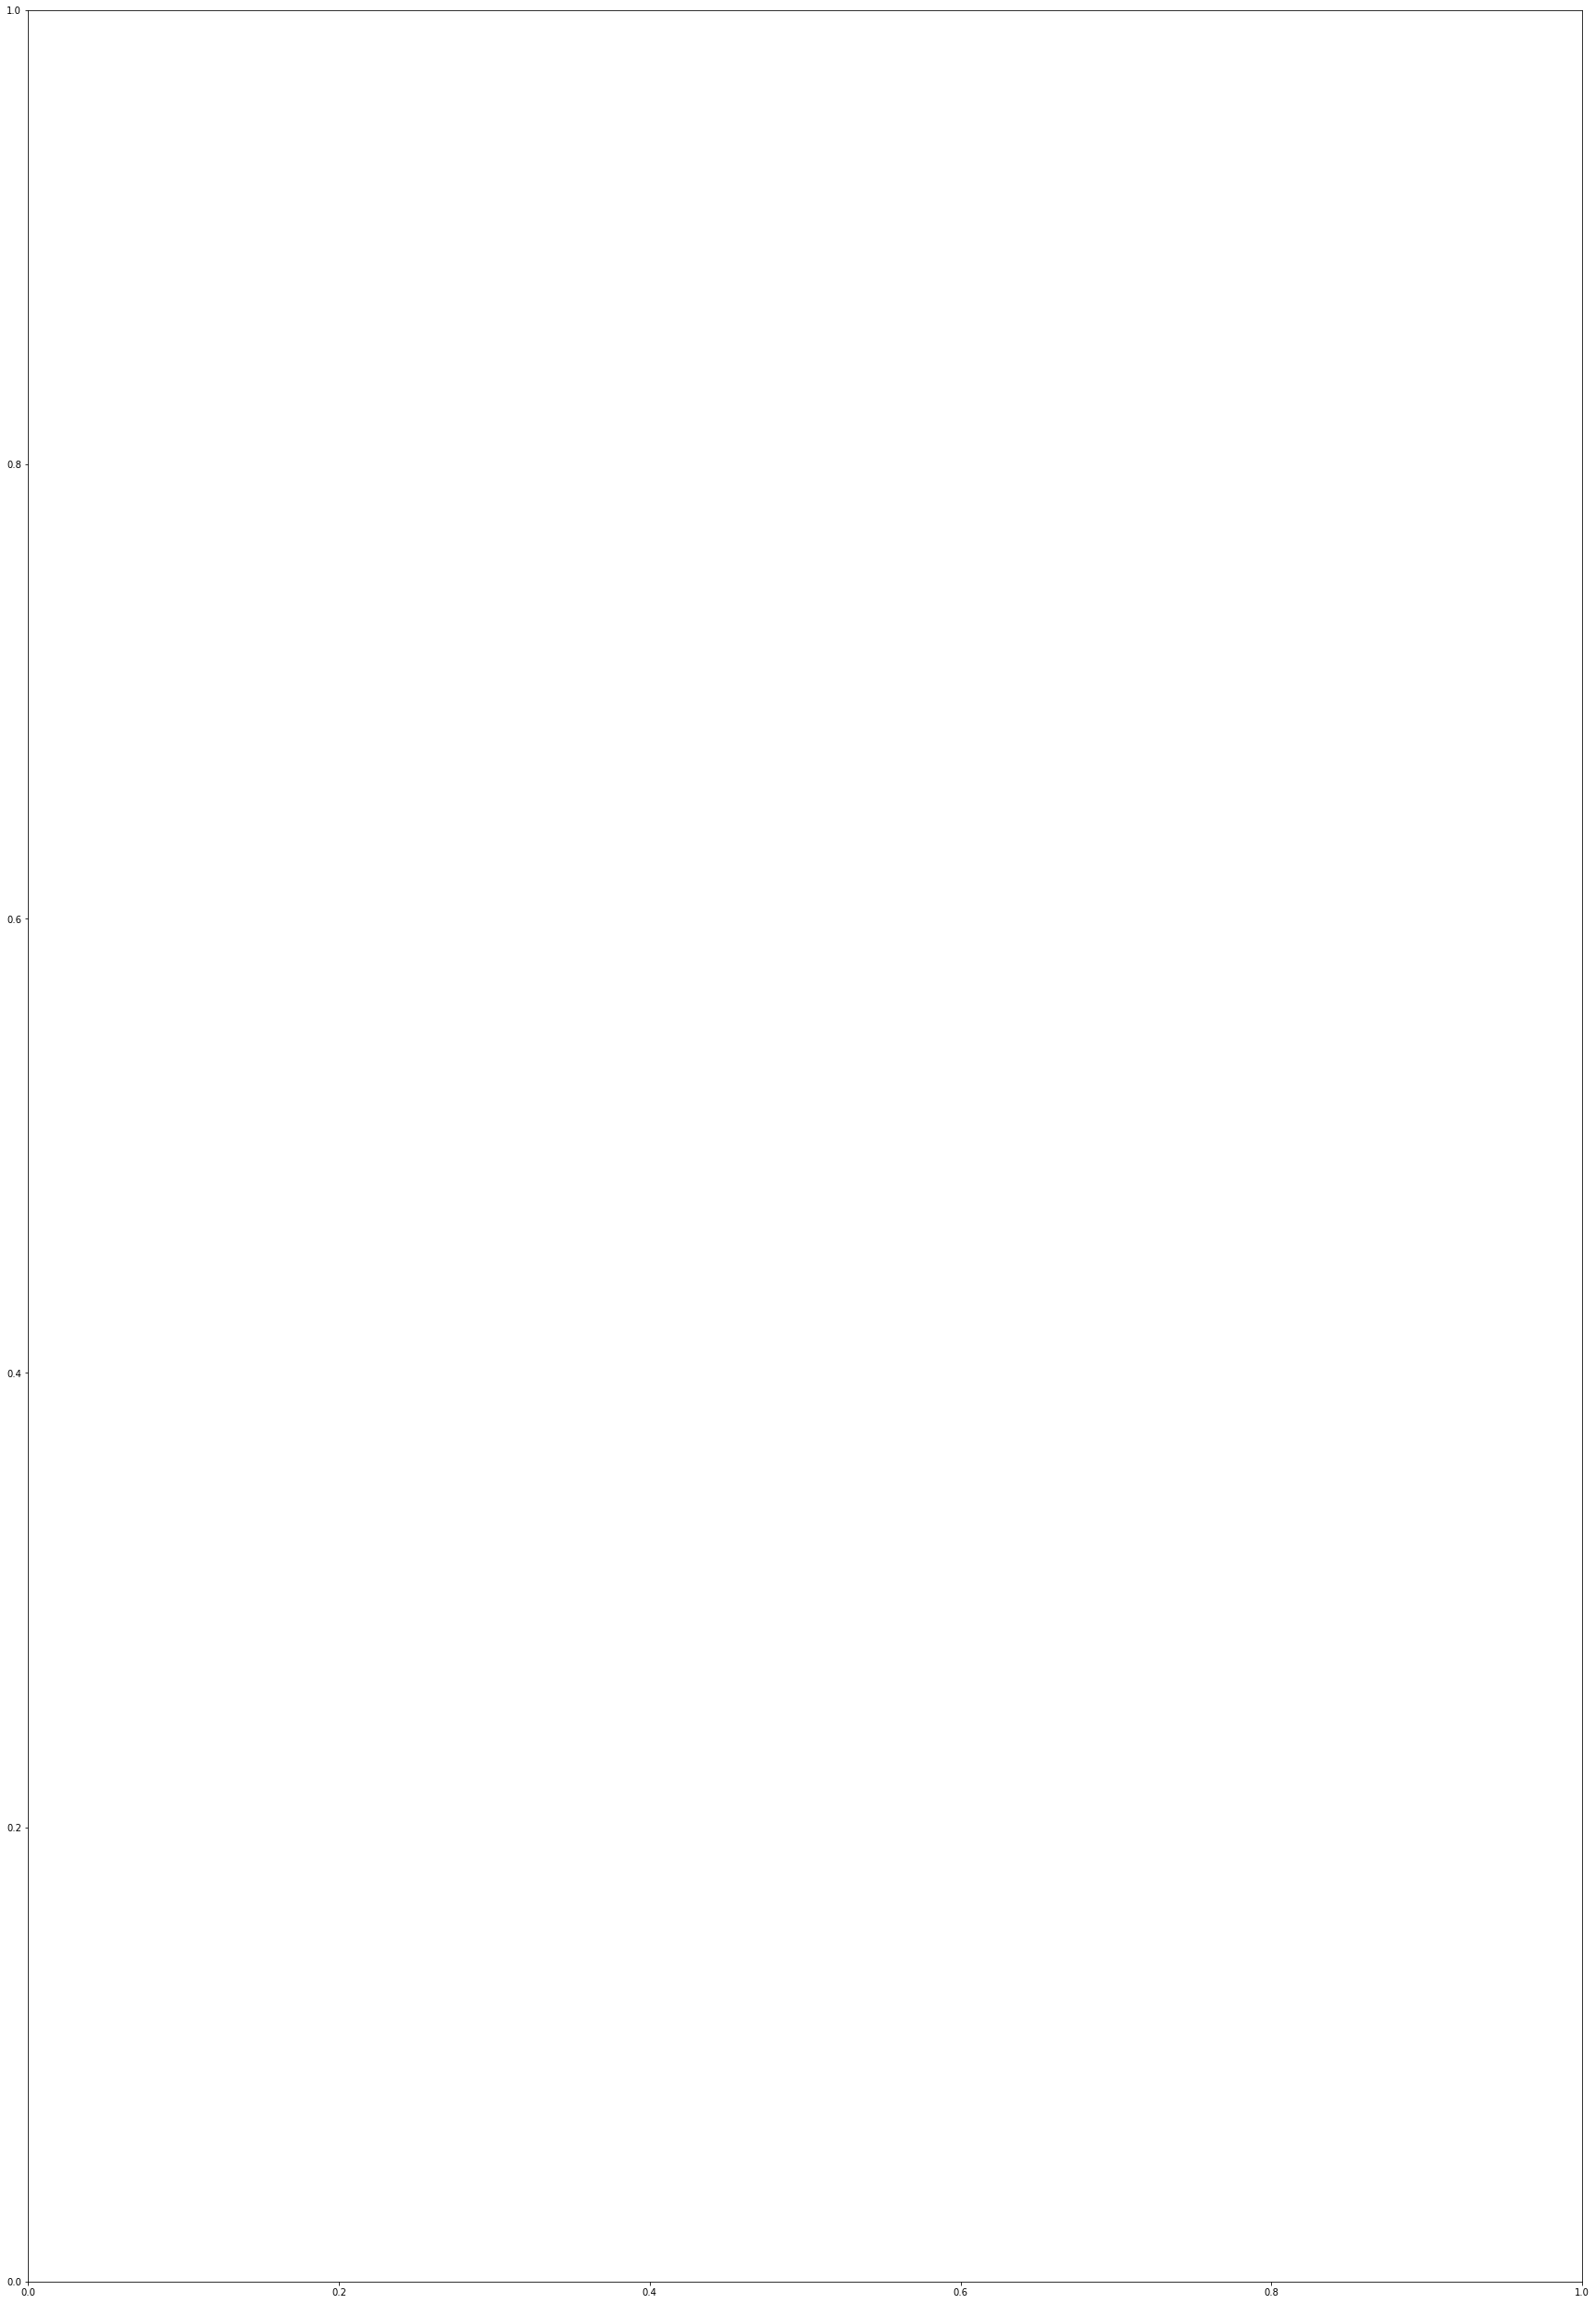

In [38]:
fig=gcf()
fig.set_facecolor('w')
fig.set_size_inches([30,45])
#R = [f'{300000 + 5000*i}.fit' for i in range(81)]
for i,fp in enumerate(R):
    ds = xr.open_dataset(fpath)
    #image_data = fits.getdata(get_pkg_data_filename( join(ds,fp)),ext=0)
    c = 'k'
    #if '410000' in fp or '415000' in fp: c = 'C2'
    #if '600000' in fp or '595000' in fp: c = 'C3'
    #if '640000' in fp or '645000' in fp or '650000' in fp: c = 'C1'
        
        
    plot(ds.sum(axis=0)+i*1e6,f'{c}')
    
[text(-130,1.6e6+1e6*i,t[:-4],color='r') for i,t in enumerate(R)]
xlim(-200,2100)

xlabel('pixel')
ylabel('intensity')
#savefig('../img/hspectra.pdf',dpi=200,bbox_inches='tight')
#plt.close()

In [33]:
#R = [f'{i}.fit' for i in [300000,301000,305000,310000,315000,350000,400000]]
R = [f'{300000 + 5000*i}.fit' for i in range(81)]

In [34]:
[i for i in R if '410000' in i or '415000' in i]

['410000.fit', '415000.fit']

In [35]:
lst = []
for i in os.listdir(specpath):
    if '410000' in i or '415000' in i:
        lst.append(i)
lst

['410000.fit', '415000.fit']

# Overlap neighbours with H-alpha

I plot neighboring frames in one figure, then shift them so the spectra coincede by adjusting the H-alpha position. This way we can get a rough shift in pixels for our selected shift in the stepping mottor coordinate. Note: stepping motor here rotates the grating, so the projection on the sensor is moving and we can record different wavelengths.

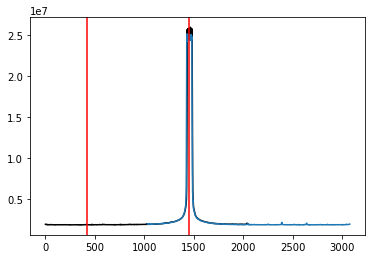

In [36]:
x = np.arange(2048)
fp = '410000.fit'
image_data = fits.getdata(get_pkg_data_filename( join(specpath,fp)),ext=0)
plot(x,image_data.sum(axis=0),'k')
fp = '415000.fit'
image_data = fits.getdata(get_pkg_data_filename( join(specpath,fp)),ext=0)
plot(x+1030,image_data.sum(axis=0),'C0')


axvline(425,c='r')
axvline(1455,c='r')

In [37]:
# Pixel to motor coordinate ratio
f'{1030/5000} pixels / motor coordinate'

'0.206 pixels / motor coordinate'

# Make an overlap spectrum

In [38]:
R = [f'{410000 + 5000*i}.fit' for i in range(50)]

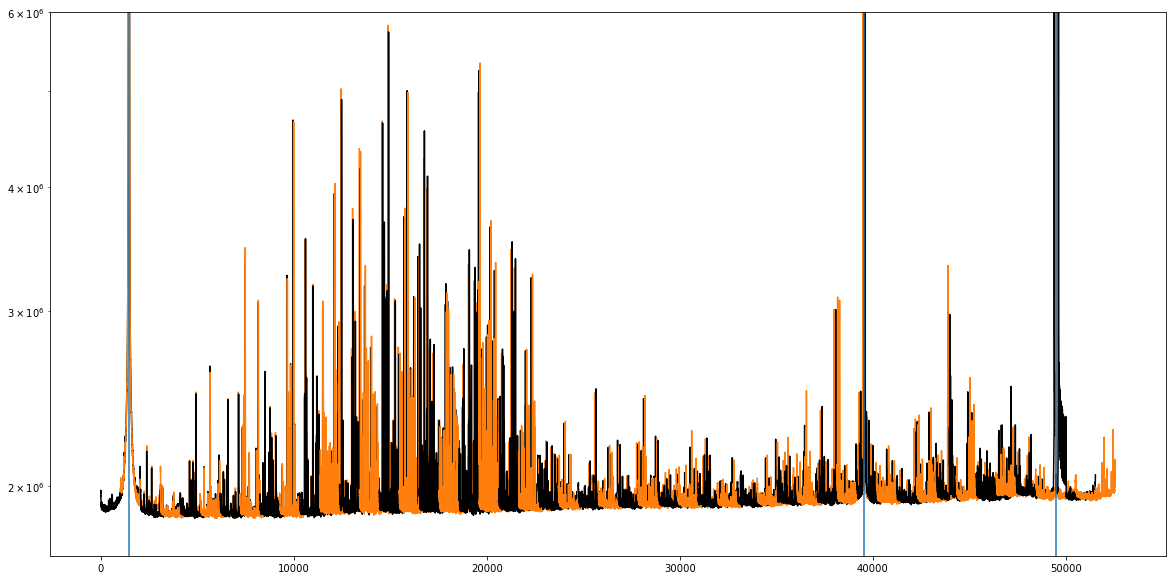

In [39]:
fig=gcf()
fig.set_facecolor('w')
fig.set_size_inches([20,10])

x = np.arange(2048)
for i,fp in enumerate(R):
    c = 'k'
    if i%2: c = 'C1'
    image_data = fits.getdata(get_pkg_data_filename( join(specpath,fp)),ext=0)
    y = image_data.sum(axis=0)
    plot(x+i*1031,y,f'{c}')


yscale('log')
ylim(1.7e6,6e6)
#xlim(0,2000)
axvline(1455)
#xlim(39000,41000)
axvline(39550)
#xlim(49000,50000)
axvline(49500)

# Make a rough calibration

Text(0, 0.5, 'wavelength, nm')

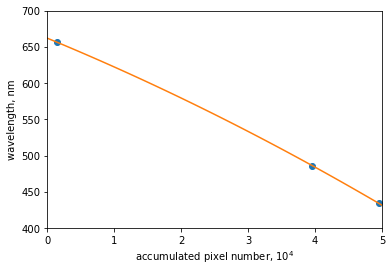

In [40]:
balmers = np.array([656.279,486.135,434.047])
rs = np.array([1455,39550,49500])
plot(rs/1e4,balmers,'o')

fun = np.poly1d(np.polyfit(rs,balmers,2))
xp = np.linspace(0,50000,100)
plot(xp/1e4,fun(xp))

ylim(400,700)
xlim(0,5)
xlabel('accumulated pixel number, $10^{4}$')
ylabel('wavelength, nm')

# Apply rough calibration

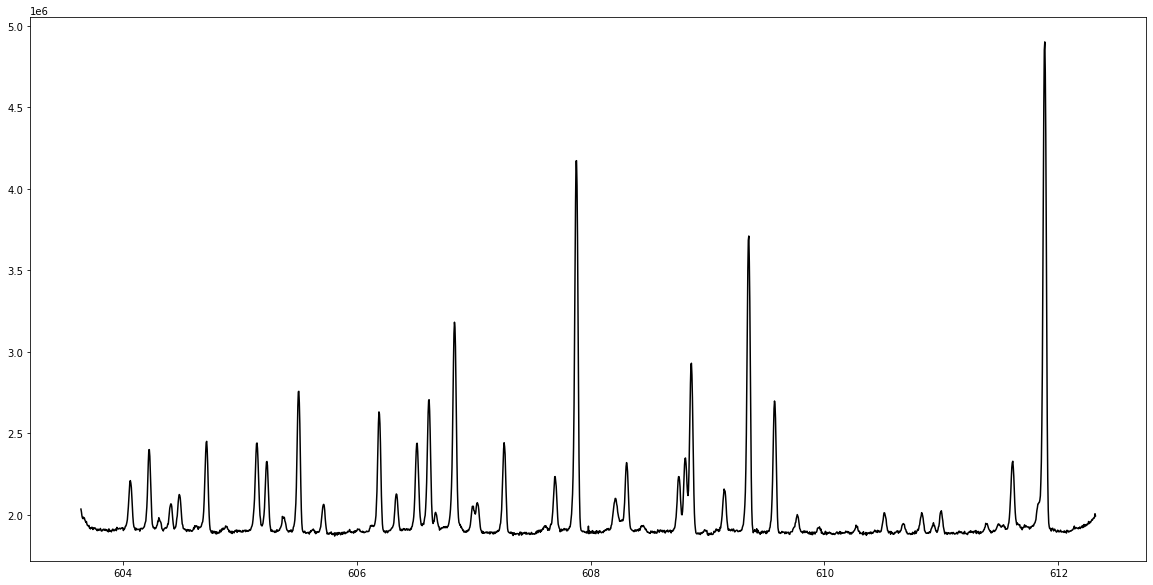

In [41]:
fig=gcf()
fig.set_facecolor('w')
fig.set_size_inches([20,10])

x = np.arange(2048)
rcoord = 470000
fp = f'{rcoord}.fit'
dx = (rcoord - 410000)*(1030/5000)
image_data = fits.getdata(get_pkg_data_filename( join(specpath,fp)),ext=0)
plot(fun(x+dx),image_data.sum(axis=0),'k')

In [42]:
rcParams["font.size"] = 18

(595.0, 630.0)

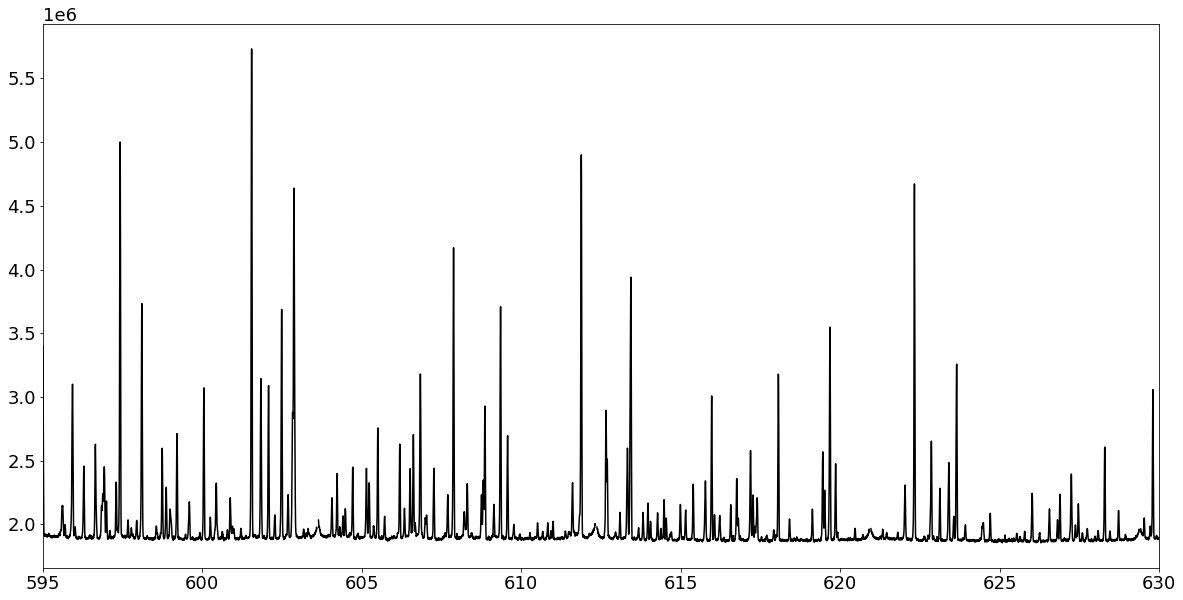

In [43]:
fig=gcf()
fig.set_facecolor('w')
fig.set_size_inches([20,10])

R = [f'{430000 + 10000*i}.fit' for i in range(8)]
x = np.arange(2048)
for i,fp in enumerate(R):
    rcoord = int(fp[:-4])
    dx = (rcoord - 410000)*(1030/5000)
    c = 'k'
    image_data = fits.getdata(get_pkg_data_filename( join(specpath,fp)),ext=0)
    y = image_data.sum(axis=0)
    plot(fun(x+dx),y,f'{c}')
    
xlim(595,630)

# The error must be about 1 nm

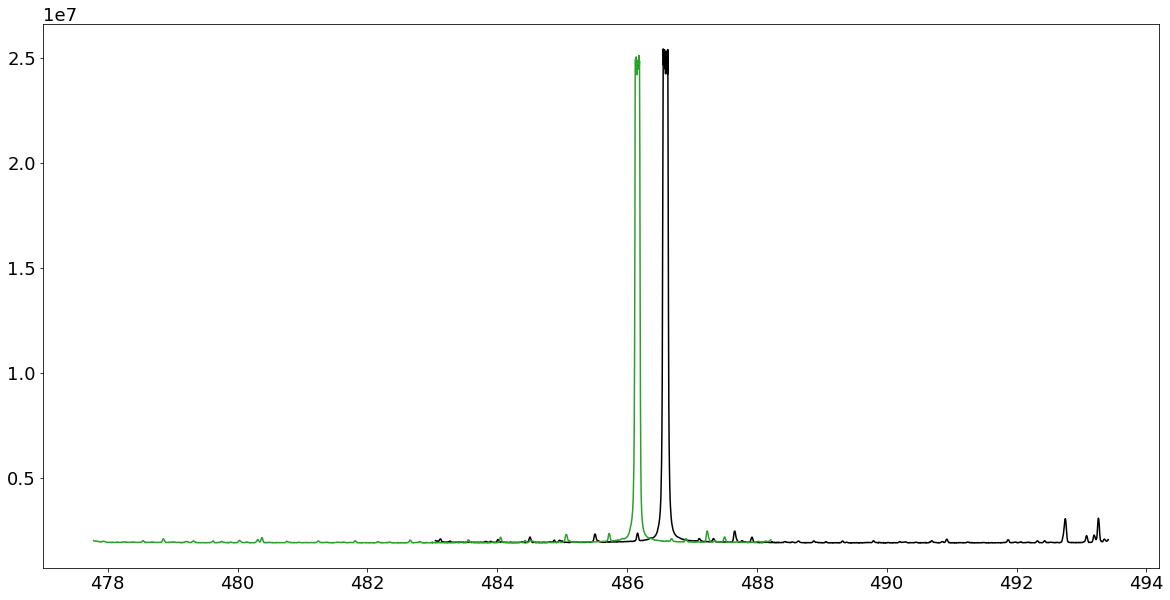

In [44]:
fig=gcf()
fig.set_facecolor('w')
fig.set_size_inches([20,10])

R = [f'{595000 + 5000*i}.fit' for i in range(2)]
x = np.arange(2048)
for i,fp in enumerate(R):
    rcoord = int(fp[:-4])
    dx = (rcoord - 410000)*(1030/5000)
    c = 'k'
    if i%2: c='C2'
    image_data = fits.getdata(get_pkg_data_filename( join(specpath,fp)),ext=0)
    y = image_data.sum(axis=0)
    plot(fun(x+dx),y,f'{c}')
    


# Plot all spectra with calibration

In [45]:
R = [f'{410000 + 5000*i}.fit' for i in range(50)]

Text(0.05, 0.92, 'stepping motor\ncoordinate')

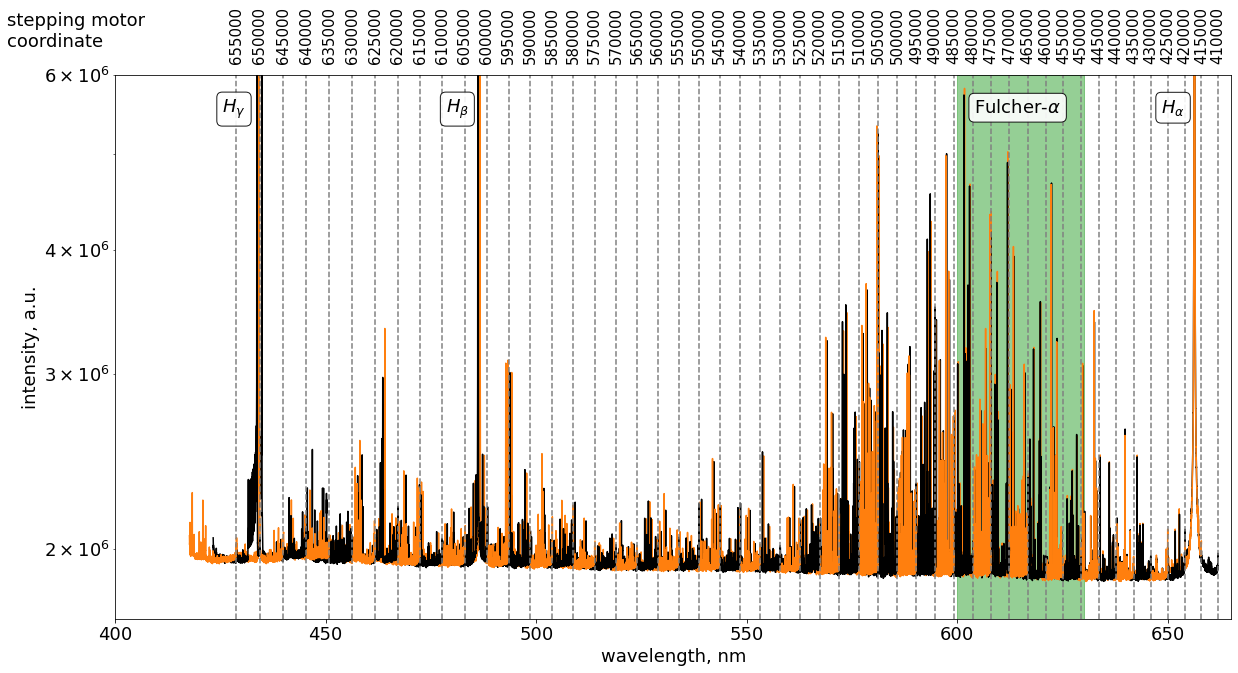

In [46]:
fig=gcf()
fig.set_facecolor('w')
fig.set_size_inches([20,10])

x = np.arange(2048)
for i,fp in enumerate(R):
    rcoord = int(fp[:-4])
    dx = (rcoord - 410000)*(1030/5000)
    c = 'k'
    if i%2: c = 'C1'
    image_data = fits.getdata(get_pkg_data_filename( join(specpath,fp)),ext=0)
    y = image_data.sum(axis=0)
    plot(fun(x+dx),y,f'{c}')
    text(fun(dx),6.2e6,rcoord,rotation=90,fontsize=15,ha='center')
    axvline(fun(dx),c='gray',ls='--')
    
ax = gca()
ax.axvspan(600,630,color='C2',alpha = 0.5)
props = dict(boxstyle='round', facecolor='w', alpha=0.9)
ax.text(604,5.5e6,'Fulcher-$\\alpha$',ha='left',bbox=props)
ax.text(654,5.5e6,'$H_\\alpha$',ha='right',bbox=props)
ax.text(484,5.5e6,'$H_\\beta$',ha='right',bbox=props)
ax.text(431,5.5e6,'$H_\\gamma$',ha='right',bbox=props)


yscale('log')
ylim(1.7e6,6e6)
xlim(400,665)

xlabel('wavelength, nm')
ylabel('intensity, a.u.')
fig.text(0.05,.92,'stepping motor\ncoordinate')

#savefig('../img/H2_lamp_spec_rough_calibration.png', dpi=200, bbox_inches='tight')

# Ne spectra